**Autori: Rajcsányi Roland, Setnický Jakub František**

Dataset 32

# Zadanie projektu

V tejto fáze sa od Vás očakáva:

**Základný opis dát spolu s ich charakteristikami (5b).**

Pre dosiahnutie plného počtu bodov uveďte

- počet záznamov,
- počet atribútov,
- ich typy,
- pre zvolené významné atribúty ich distribúcie, základné deskriptívne štatistiky a pod.

**Párová analýza dát (5b).**

- Preskúmajte vzťahy medzi zvolenými dvojicami atribútov.
- Identifikujte závislostí medzi dvojicami atribútov (napr. korelácie) a na závislosti medzi predikovanou premennou a ostatnými premennými (potenciálnymi prediktormi).

**Formulácia a štatistické overenie hypotéz o dátach (2b).**

- Mali by ste sformulovať aspoň dve hypotézy o dátach, ktoré budú relevantné v kontexte zadanej predikčnej úlohy. Príkladom hypotézy v doméne (v závislosti od pridelenej dátovej sady) môže byť, napr. *pacienti s chorobou štítnej žľazy majú v priemere inú (vyššiu/nižšiu) hodnotu nejakej látky alebo hormónu ako pacienti bez danej choroby*.
- Vami sformulované hypotézy overte vhodne zvoleným štatistickým testom.

**Identifikácia problémov v dátach spolu s predpokladaným scenárom riešenia v ďalšej fáze (4b).**

Identifikujte, čo a ako budete musieť v rámci predspracovania vyriešiť v ďalšej fáze, napr.:

- nevhodná štruktúra dát (dáta nie sú v tabuľkovej podobe alebo jedna entita je opísaná viacerými riadkami tabuľky)
- duplicitné záznamy, resp. nejednoznačné mapovanie medzi záznamami
- nejednotné formáty dát
- chýbajúce hodnoty
- vychýlené (odľahlé) hodnoty
- v dátach sa môžu nachádzať aj iné, tu nevymenované problémy.

**V odovzdanej správe (`Jupyter Notebooku`) by ste tak mali vedieť zodpovedať na otázky**

- Majú dáta vhodný formát pre ďalšie spracovanie? Ak nie, aké problémy sa v nich vyskytujú?
- Sú niektoré atribúty medzi sebou závislé? Od ktorých (jednotlivých) atribútov závisí predikovaná premenná?
- Sú v dátach chýbajúce hodnoty? Ako sú reprezentované? Ako plánujete riešiť problém chýbajúcich hodnôt pre jednotlivé atribúty, resp. pozorovania? (Pre rôzne atribúty môže byť vhodné použiť rôzne stratégie.)
- Nadobúdajú niektoré atribúty nezmyselné (nekonzistentné) či inak výrazne odchýlené hodnoty? Ktoré?
- Ako plánujete v ďalšej fáze tieto identifikované problémy adresovať / riešiť?

> Správa sa odovzdáva v 6. týždni semestra na cvičení. Dvojica svojmu cvičiacemu odprezentuje vykonanú prieskumnú analýzu v Jupyter Notebooku). Následne správu elektronicky odovzdá jeden člen z dvojice do systému AIS do nedele 01.11.2020 23:59.

In [1]:
import matplotlib.pyplot as plt
import pylab as py
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms
import scipy.stats as stats
from sklearn import preprocessing
from numpy.random import seed
from numpy.random import rand
from numpy.random import randn
from numpy import mean
from numpy import var
from math import sqrt
import re
import json

In [2]:
personal_data = pd.read_csv("Dataset/personal_train.csv")
other_data = pd.read_csv("Dataset/other_train.csv")

## Základné informácie o datasetoch
Dataset personal_data:
* Veľkosť: 3933 záznamov
* Počet stĺpcov: 6
* Typy stĺpcov sú uvedené nižsie(získané pomocou dataset.info())
* **Tento dataset néma žiadne duplicitné či chýbajúce dáta**
* Dôležité štatistické atribúty:
*    * Vek(age)
*    * Pohlavie(sex)

Vlastnosti štatistických atribútov uvedené nižšie (získané pomocou dataset\['atribute'\].describe())

Dataset personal_data:
* Veľkosť: 3983 záznamov
* Počet stĺpcov: 23
* Typy stĺpcov sú uvedené nižsie(získané pomocou dataset.info())
* **Tento dataset obsahuje značné množstvo duplicitných či chýbajúcich dát**
* Dôležité štatistické atribúty:
*    * Krajina pôvodu(native-country)
*    * Rasa(race)
*    * Vzťahy(relationship)
*    * Priemerné O2 (mean_oxygen)
*    * Tehotenstvo (pregnant)

Vlastnosti štatistických atribútov uvedené nižšie (získané pomocou dataset\['atribute'\].describe())

Obsahom datasetu other_data je aj atribút medical_info ktorý obsahuje reťazec podobný formátu JSON s ďaľšími atribútmi ktoré môžu byť štatisticky doležité a preto bol tento reťazec extraktovaný a v spojení s atribútom name z datasetu other_data pridaný do samostatného datasetu medical_info_dataset. 

*Poznámka: Boli pridávané iba záznamy pre jedičné hodnoty atribútu name a s nenulovým atribútom medical_info*

Dataset medical_info_dataset:
* Veľkosť: 3927 záznamov
* Počet stĺpcov: 5
* Typy stĺpcov sú uvedené nižsie(získané pomocou dataset.info())

Všetky atribúty tohto datasetu sú štatisticky dôležité a ich vlastnosti sú uvedené nižsie (získané pomocou dataset\['atribute'\].describe())

Všetky vyššie spomenuté datasety sme spojili do jedného datasetu pre možnosť jednoduchšie pracovať so všetkými dôležitými dátami

Dataset usefull_dataset:
* Veľkosť: 3933 záznamov
* Počet stĺpcov: 29
* Typy stĺpcov sú uvedené nižsie(získané pomocou dataset.info())

In [3]:
if 'Unnamed: 0' in personal_data:
    del personal_data['Unnamed: 0']
if 'Unnamed: 0' in other_data:
    del other_data['Unnamed: 0']

In [4]:
personal_data.head()

,name,address,age,sex,date_of_birth
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",58,Female,18/01/1961
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",56,Male,1962-11-08
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",52,Male,1967-04-18
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",64,Male,55-09-04
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",66,Male,1952-12-05


In [5]:
personal_data.describe(include='all')

,name,address,age,sex,date_of_birth
count,3933,3933,3933.000000,3933,3933
unique,3933,3933,NaN,2,3707
top,Joseph Molleda,"5384 Hurst Groves Apt. 092\r\nFreemanview, SD ...",NaN,Male,1976-02-18
freq,1,1,NaN,2597,3
mean,NaN,NaN,51.816934,NaN,NaN
std,NaN,NaN,11.814803,NaN,NaN
min,NaN,NaN,-1.000000,NaN,NaN
25%,NaN,NaN,44.000000,NaN,NaN
50%,NaN,NaN,52.000000,NaN,NaN
75%,NaN,NaN,60.000000,NaN,NaN


In [6]:
personal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3933 non-null   object
 1   address        3933 non-null   object
 2   age            3933 non-null   int64 
 3   sex            3933 non-null   object
 4   date_of_birth  3933 non-null   object
dtypes: int64(1), object(4)
memory usage: 153.8+ KB


In [7]:
personal_data['age'].describe()

count    3933.000000
mean       51.816934
std        11.814803
min        -1.000000
25%        44.000000
50%        52.000000
75%        60.000000
max       113.000000
Name: age, dtype: float64

In [8]:
personal_data['sex'].describe()

count      3933
unique        2
top        Male
freq       2597
Name: sex, dtype: object

In [9]:
other_data.head()

,name,address,kurtosis_oxygen,occupation,marital-status,pregnant,education-num,relationship,std_oxygen,capital-gain,...,fnlwgt,class,income,medical_info,native-country,capital-loss,mean_oxygen,hours-per-week,race,workclass
0,Joel Martinez,"2014 Fitzpatrick Springs\r\nJimmybury, MI 83417",9.672970,Transport-moving,Married-civ-spouse,f,NaN,Husband,14.678821,0.0,...,201410.0,0.0,>50K,"{'mean_glucose':'117.4375','std_glucose':'47.6...",Philippines,1977.0,2.445652,45.0,White,Private
1,Mike Delacruz,"PSC 6835, Box 2308\r\nAPO AP 84084",8.175772,Other-service,Never-married,f,9.0,Own-child,17.521978,0.0,...,85625.0,0.0,<=50K,"{'mean_glucose':'132.8984375','std_glucose':'4...",United-States,0.0,2.633779,22.0,White,Private
2,Tony Kell,"847 Martin Locks Apt. 982\r\nEast Lauratown, N...",4.498688,Prof-specialty,Divorced,f,11.0,Not-in-family,40.829288,0.0,...,211022.0,0.0,>50K,"{'mean_glucose':'123.546875','std_glucose':'69...",United-States,0.0,9.512542,40.0,White,Private
3,Clarence Archer,"6376 Christine Hollow Suite 091\r\nDunnshire, ...",0.531520,Sales,Married-civ-spouse,f,10.0,Husband,77.672185,0.0,...,291147.0,0.0,<=50K,"{'mean_glucose':'136.0625','std_glucose':'47.1...",United-States,0.0,60.436455,50.0,White,Private
4,Bradford Hayek,"7115 Snyder Key Apt. 041\r\nWest Tina, DE 78012",3.257489,Craft-repair,Divorced,f,9.0,Not-in-family,49.288231,0.0,...,149118.0,0.0,<=50K,"{'mean_glucose':'116.546875','std_glucose':'45...",United-States,0.0,14.475753,40.0,White,Private


In [10]:
other_data.describe(include='all')

,name,address,kurtosis_oxygen,occupation,marital-status,pregnant,education-num,relationship,std_oxygen,capital-gain,...,fnlwgt,class,income,medical_info,native-country,capital-loss,mean_oxygen,hours-per-week,race,workclass
count,3983,3983,3973.000000,3963,3967,3973,3572.000000,3970,3966.000000,3970.000000,...,3.974000e+03,3966.000000,3966,3970,3973,3970.000000,3967.000000,3970.000000,3719,3969
unique,3933,3933,NaN,27,6,6,NaN,6,NaN,NaN,...,NaN,NaN,2,3933,39,NaN,NaN,NaN,6,9
top,James Leclaire,Unit 2648 Box 4428\r\nDPO AP 76967,NaN,Exec-managerial,Married-civ-spouse,f,NaN,Husband,NaN,NaN,...,NaN,NaN,<=50K,"{'mean_glucose':'113.1328125','std_glucose':'5...",United-States,NaN,NaN,NaN,White,Private
freq,2,2,NaN,470,1794,3500,NaN,1591,NaN,NaN,...,NaN,NaN,3056,2,3595,NaN,NaN,NaN,3084,2794
mean,NaN,NaN,7.420864,NaN,NaN,NaN,10.064390,NaN,31.132719,1065.936524,...,1.888549e+05,0.254917,NaN,NaN,NaN,82.034509,18.441636,40.320907,NaN,NaN
std,NaN,NaN,4.809985,NaN,NaN,NaN,2.583102,NaN,22.274062,7326.276262,...,1.064878e+05,0.435869,NaN,NaN,NaN,390.242195,34.731076,12.234185,NaN,NaN
min,NaN,NaN,-2.597872,NaN,NaN,NaN,1.000000,NaN,7.370432,0.000000,...,1.882700e+04,0.000000,NaN,NaN,NaN,0.000000,0.213211,1.000000,NaN,NaN
25%,NaN,NaN,3.661144,NaN,NaN,NaN,9.000000,NaN,15.025901,0.000000,...,1.171235e+05,0.000000,NaN,NaN,NaN,0.000000,2.061873,40.000000,NaN,NaN
50%,NaN,NaN,7.788552,NaN,NaN,NaN,10.000000,NaN,20.551260,0.000000,...,1.796535e+05,0.000000,NaN,NaN,NaN,0.000000,3.232441,40.000000,NaN,NaN
75%,NaN,NaN,10.279982,NaN,NaN,NaN,13.000000,NaN,43.117184,0.000000,...,2.328732e+05,1.000000,NaN,NaN,NaN,0.000000,12.623746,45.000000,NaN,NaN


In [11]:
other_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             3983 non-null   object 
 1   address          3983 non-null   object 
 2   kurtosis_oxygen  3973 non-null   float64
 3   occupation       3963 non-null   object 
 4   marital-status   3967 non-null   object 
 5   pregnant         3973 non-null   object 
 6   education-num    3572 non-null   float64
 7   relationship     3970 non-null   object 
 8   std_oxygen       3966 non-null   float64
 9   capital-gain     3970 non-null   float64
 10  skewness_oxygen  3963 non-null   float64
 11  education        3963 non-null   object 
 12  fnlwgt           3974 non-null   float64
 13  class            3966 non-null   float64
 14  income           3966 non-null   object 
 15  medical_info     3970 non-null   object 
 16  native-country   3973 non-null   object 
 17  capital-loss  

In [12]:
other_data['native-country'].describe()

count               3973
unique                39
top        United-States
freq                3595
Name: native-country, dtype: object

In [13]:
other_data['race'].describe()

count       3719
unique         6
top        White
freq        3084
Name: race, dtype: object

In [14]:
other_data['relationship'].describe()

count         3970
unique           6
top        Husband
freq          1591
Name: relationship, dtype: object

In [15]:
other_data['mean_oxygen'].describe()

count    3967.000000
mean       18.441636
std        34.731076
min         0.213211
25%         2.061873
50%         3.232441
75%        12.623746
max       217.371238
Name: mean_oxygen, dtype: float64

In [16]:
other_data['pregnant'].describe()

count     3973
unique       6
top          f
freq      3500
Name: pregnant, dtype: object

In [17]:
# Create subset with only unique names
unique_names_dataset = other_data.drop_duplicates('name')
unique_names_dataset.head()

,name,address,kurtosis_oxygen,occupation,marital-status,pregnant,education-num,relationship,std_oxygen,capital-gain,...,fnlwgt,class,income,medical_info,native-country,capital-loss,mean_oxygen,hours-per-week,race,workclass
0,Joel Martinez,"2014 Fitzpatrick Springs\r\nJimmybury, MI 83417",9.672970,Transport-moving,Married-civ-spouse,f,NaN,Husband,14.678821,0.0,...,201410.0,0.0,>50K,"{'mean_glucose':'117.4375','std_glucose':'47.6...",Philippines,1977.0,2.445652,45.0,White,Private
1,Mike Delacruz,"PSC 6835, Box 2308\r\nAPO AP 84084",8.175772,Other-service,Never-married,f,9.0,Own-child,17.521978,0.0,...,85625.0,0.0,<=50K,"{'mean_glucose':'132.8984375','std_glucose':'4...",United-States,0.0,2.633779,22.0,White,Private
2,Tony Kell,"847 Martin Locks Apt. 982\r\nEast Lauratown, N...",4.498688,Prof-specialty,Divorced,f,11.0,Not-in-family,40.829288,0.0,...,211022.0,0.0,>50K,"{'mean_glucose':'123.546875','std_glucose':'69...",United-States,0.0,9.512542,40.0,White,Private
3,Clarence Archer,"6376 Christine Hollow Suite 091\r\nDunnshire, ...",0.531520,Sales,Married-civ-spouse,f,10.0,Husband,77.672185,0.0,...,291147.0,0.0,<=50K,"{'mean_glucose':'136.0625','std_glucose':'47.1...",United-States,0.0,60.436455,50.0,White,Private
4,Bradford Hayek,"7115 Snyder Key Apt. 041\r\nWest Tina, DE 78012",3.257489,Craft-repair,Divorced,f,9.0,Not-in-family,49.288231,0.0,...,149118.0,0.0,<=50K,"{'mean_glucose':'116.546875','std_glucose':'45...",United-States,0.0,14.475753,40.0,White,Private


In [18]:
# create a dataset from 'medical_info' attribute
medical_data_objects = []
for index, record in unique_names_dataset.iterrows():
    if isinstance(record['medical_info'], float):
        continue
    medical_object = json.loads(record['medical_info'].replace("\'", '\"').replace(':\"',':').replace('\",',',').replace('\"}','}'))
    medical_object['name'] = record['name']
    medical_data_objects.append(medical_object)
medical_info_dataset = pd.DataFrame(medical_data_objects)
medical_info_dataset.describe()

,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose
count,3927.000000,3927.000000,3927.000000,3927.000000
mean,100.587738,45.172079,0.952515,4.224586
std,3275.793855,7.609400,1.611857,9.684350
min,-16178.125000,25.695250,-1.641515,-1.755332
25%,84.269531,40.163947,0.072237,-0.119656
50%,110.945312,45.887420,0.311431,0.373241
75%,125.832031,50.361097,0.779006,2.090947
max,15078.125000,91.206475,8.069522,68.101622


In [19]:
medical_info_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927 entries, 0 to 3926
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mean_glucose      3927 non-null   float64
 1   std_glucose       3927 non-null   float64
 2   kurtosis_glucose  3927 non-null   float64
 3   skewness_glucose  3927 non-null   float64
 4   name              3927 non-null   object 
dtypes: float64(4), object(1)
memory usage: 153.5+ KB


c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean_glucose', ylabel='Density'>

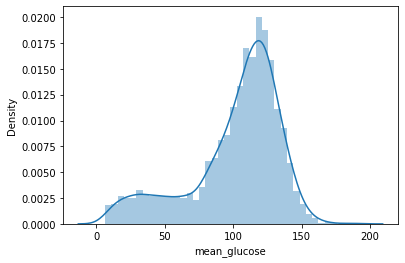

In [20]:
sns.distplot(medical_info_dataset[(medical_info_dataset['mean_glucose'] > 0) & (medical_info_dataset['mean_glucose'] < 300)].mean_glucose)

In [21]:
# names in personal_data and unique_names_dataset are equal on equal positions
personal_data['name'].isin(unique_names_dataset['name']).value_counts()

True    3933
Name: name, dtype: int64

In [22]:
# merge datasets to create single large dataset with usefull data so it's easier to create graphs and analysis
merged_medical_info_dataset = unique_names_dataset.merge(medical_info_dataset, on=['name'], how='outer').drop('medical_info', axis='columns')
usefull_dataset = personal_data.merge(merged_medical_info_dataset, on=['name', 'address'], how='outer')
usefull_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3932
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3933 non-null   object 
 1   address           3933 non-null   object 
 2   age               3933 non-null   int64  
 3   sex               3933 non-null   object 
 4   date_of_birth     3933 non-null   object 
 5   kurtosis_oxygen   3929 non-null   float64
 6   occupation        3924 non-null   object 
 7   marital-status    3923 non-null   object 
 8   pregnant          3930 non-null   object 
 9   education-num     3533 non-null   float64
 10  relationship      3925 non-null   object 
 11  std_oxygen        3924 non-null   float64
 12  capital-gain      3926 non-null   float64
 13  skewness_oxygen   3925 non-null   float64
 14  education         3926 non-null   object 
 15  fnlwgt            3928 non-null   float64
 16  class             3924 non-null   float64


### Distribúcia veku podľa pohlavia

In [23]:
# create two subsets for records of Male and Female age
male_age = usefull_dataset[(usefull_dataset['sex'] == " Male") & (usefull_dataset['age'] > 0)]
female_age = usefull_dataset[(usefull_dataset['sex'] == " Female") & (usefull_dataset['age'] > 0)]

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,1336.0,51.961078,11.842726,3.0,45.0,53.0,60.0,87.0
Male,2596.0,51.763097,11.758772,9.0,44.0,52.0,59.0,113.0


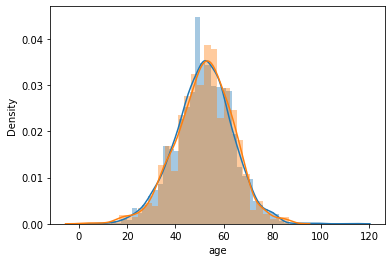

In [24]:
# compare distribution of age of male and female dataset
sns.distplot(male_age['age'])
sns.distplot(female_age['age'])
usefull_dataset[usefull_dataset['age'] > 0].groupby(['sex'])['age'].describe()

In [25]:
# test whether male and female datasets are from distributions of equal variances
age_sex_levene_test = stats.levene(male_age['age'], female_age['age'])
print(age_sex_levene_test)

# interpret
alpha = 0.05
if age_sex_levene_test.pvalue > alpha:
    print('Equal variances (fail to reject H0)')
else:
    print('Another variances (reject H0)')

LeveneResult(statistic=0.029279739690445113, pvalue=0.8641435373024612)
Equal variances (fail to reject H0)


In [26]:
# test whether male and female datasets are from equal distributions
age_sex_student_ttest, p = stats.ttest_ind(male_age['age'], female_age['age'])
print('Statistics=%.3f, p=%.3f' % (age_sex_student_ttest, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=-0.499, p=0.618
Same distributions (fail to reject H0)


### Ditribúcia týždenných hodín podľa pohlavia

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,1333.0,36.278320,11.920965,1.0,30.0,40.0,40.0,99.0
Male,2596.0,42.392912,11.874800,2.0,40.0,40.0,48.0,99.0


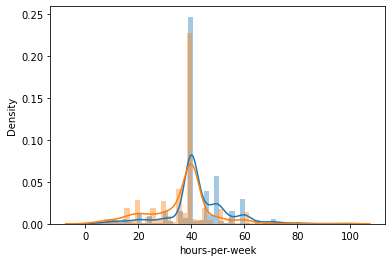

In [27]:
female_hours = usefull_dataset[(usefull_dataset['sex'] == " Female") & (usefull_dataset['hours-per-week'] > 0)]
male_hours = usefull_dataset[(usefull_dataset['sex'] == " Male") & (usefull_dataset['hours-per-week'] > 0)]
sns.distplot(male_hours['hours-per-week'])
sns.distplot(female_hours['hours-per-week'])
usefull_dataset[usefull_dataset['hours-per-week'] > 0].groupby(['sex'])['hours-per-week'].describe()

In [28]:
# test whether male and female datasets are from distributions of equal variances
hours_sex_levene_test = stats.levene(male_hours['hours-per-week'], female_hours['hours-per-week'])
print(hours_sex_levene_test)

# interpret
alpha = 0.05
if hours_sex_levene_test.pvalue > alpha:
    print('Equal variances (fail to reject H0)')
else:
    print('Another variances (reject H0)')

LeveneResult(statistic=2.112112571040764, pvalue=0.1462173564857972)
Equal variances (fail to reject H0)


In [29]:
# test whether male and female datasets are from equal distributions
hours_sex_student_ttest, p = stats.ttest_ind(male_hours['hours-per-week'], female_age['hours-per-week'])
print('Statistics=%.3f, p=%.3f' % (hours_sex_student_ttest, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=nan, p=nan
Different distributions (reject H0)


## Párová analýza

V tejto časti sme vytvorili párový graf z datasetu usefull_dataset a na základe výsledných párov grafov sme overovali závislosti a korelácie medzi atribútmi

KeyboardInterrupt: 

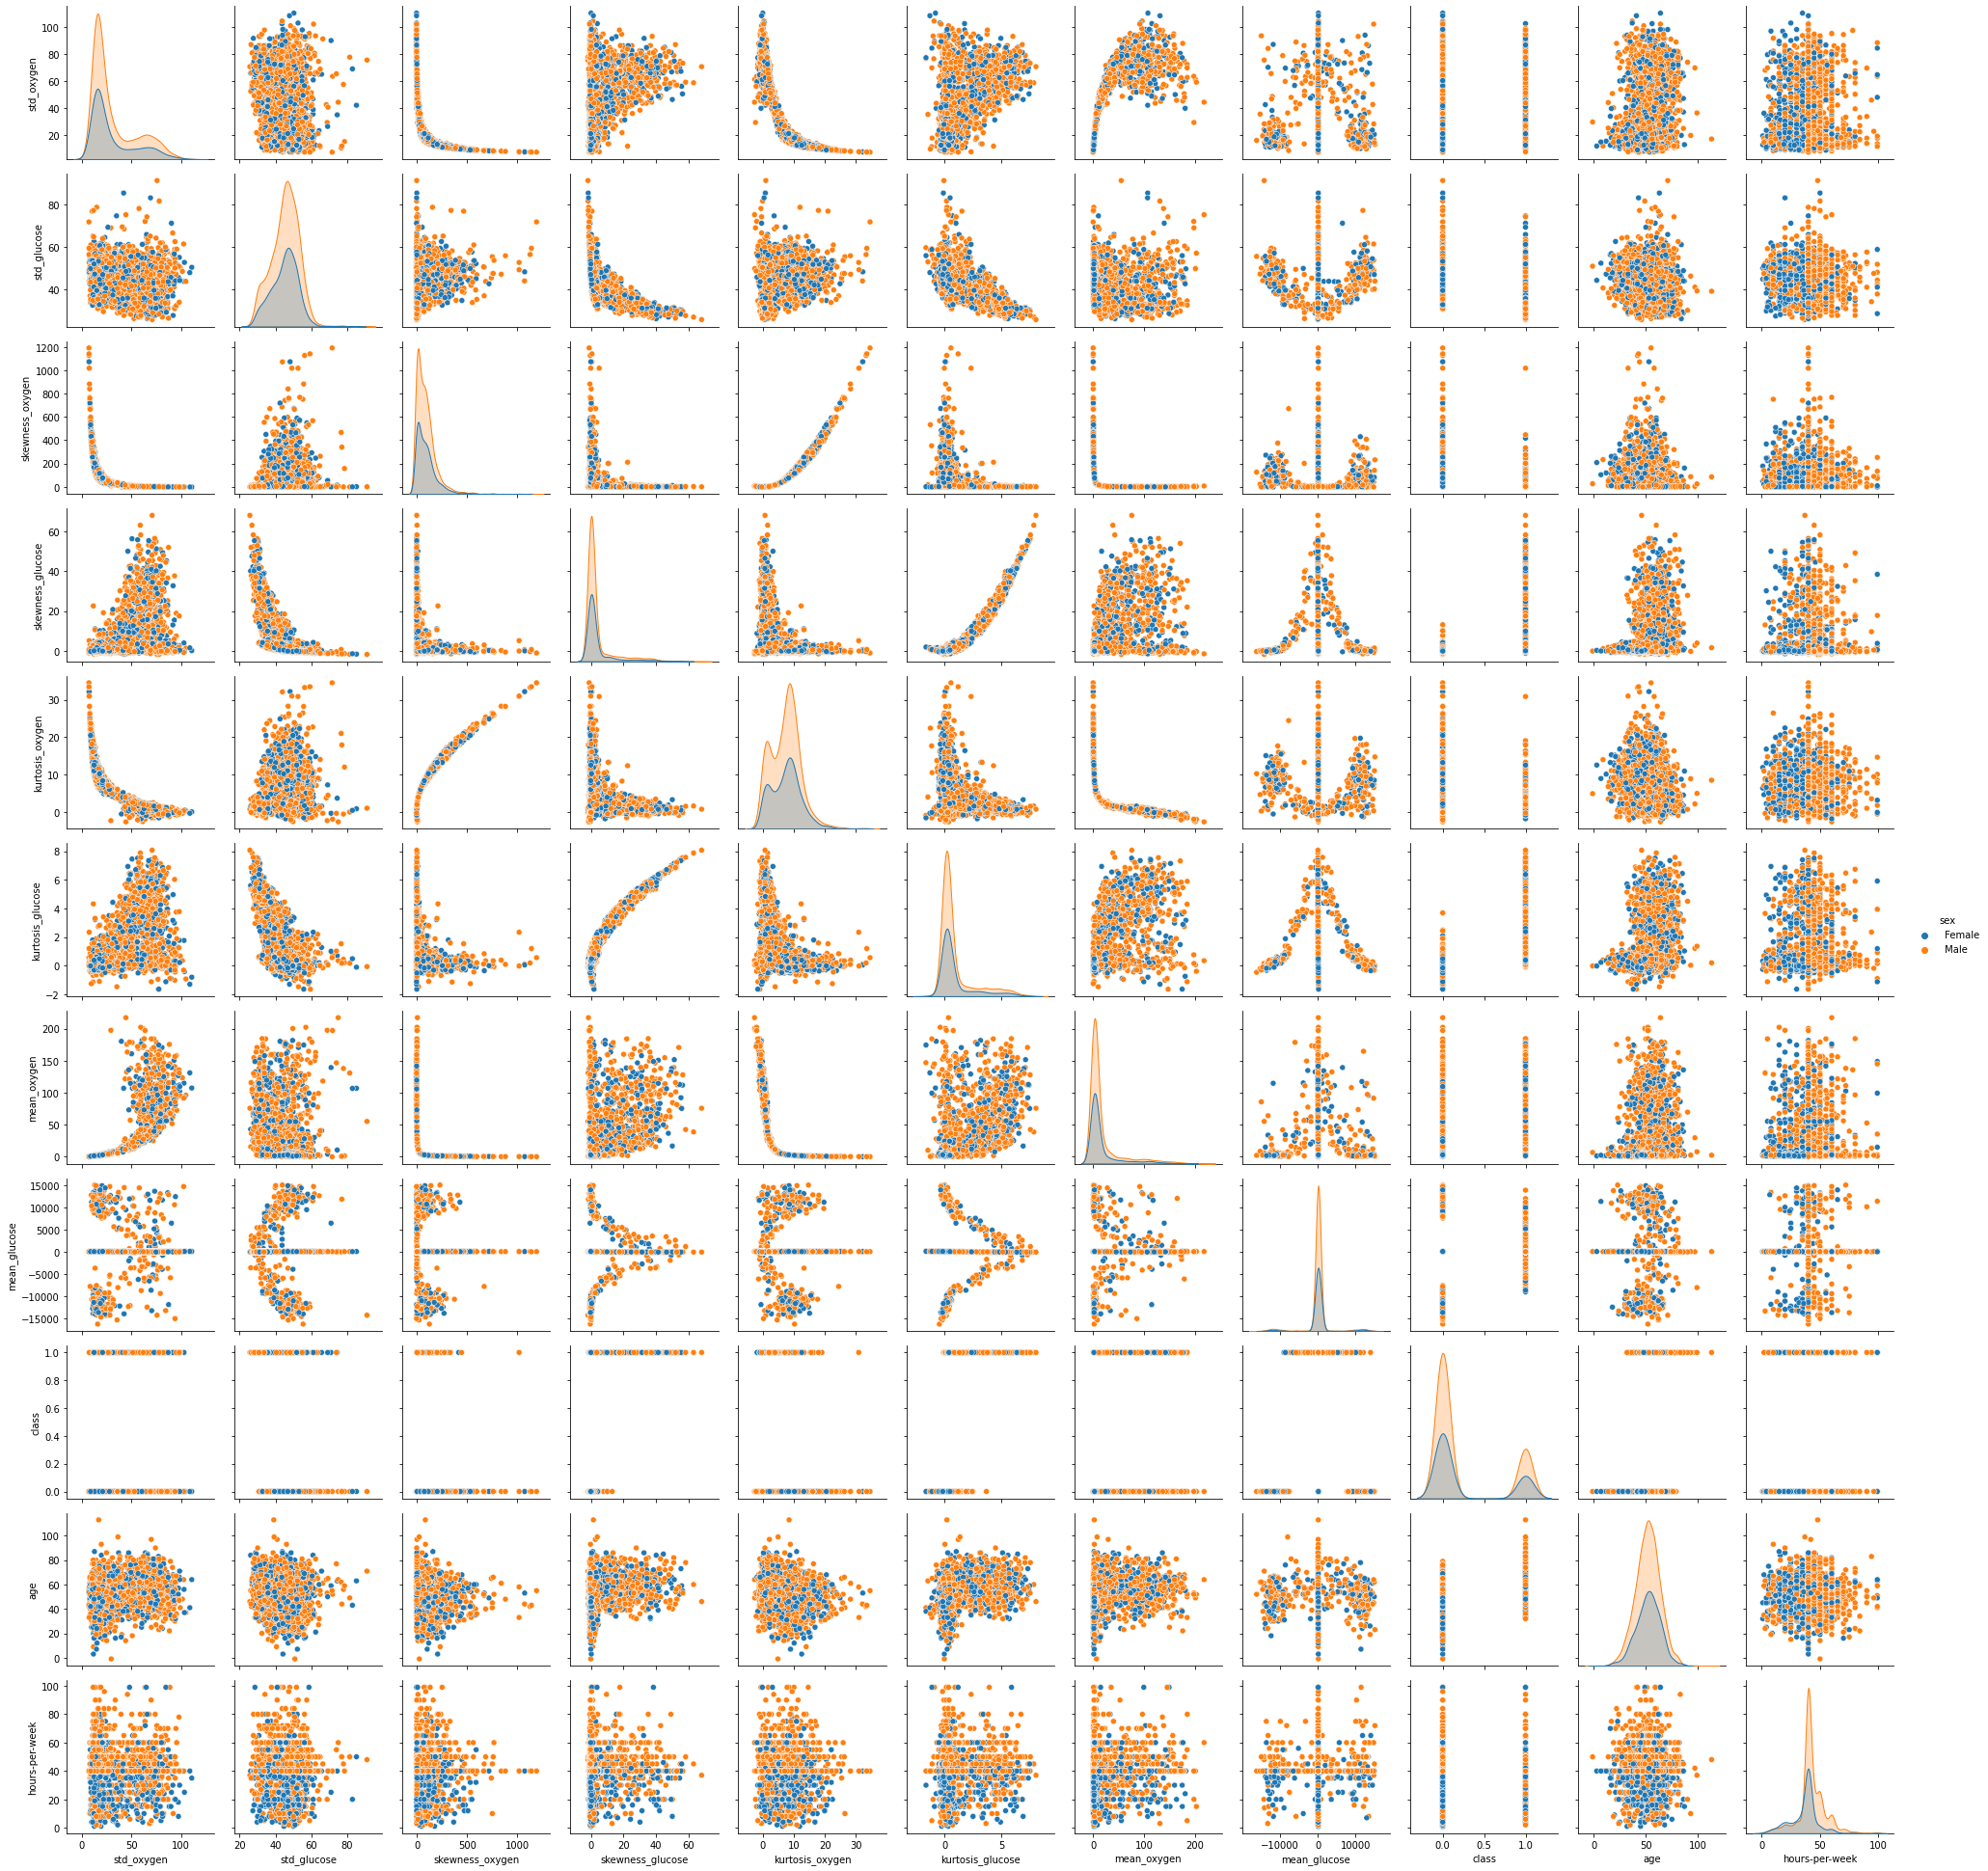

In [30]:
sns.pairplot(usefull_dataset[['race', 'std_oxygen', 'std_glucose', 'skewness_oxygen', 'skewness_glucose', 'kurtosis_oxygen', 'kurtosis_glucose', 'mean_oxygen', 'mean_glucose', 'native-country', 'class', 'age', 'hours-per-week', 'sex']], hue='sex')

### Analyza odchylky glukozy a odchylky kyslika

In [31]:
skew_oxy_ana = usefull_dataset['skewness_oxygen']
skew_glu_ana = usefull_dataset['skewness_glucose']
class_ana = usefull_dataset['class']

<AxesSubplot:xlabel='skewness_glucose', ylabel='skewness_oxygen'>

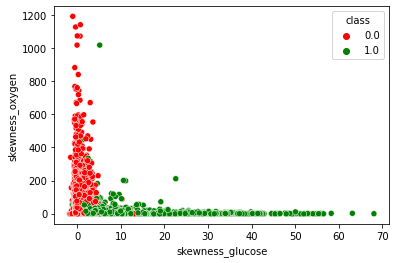

In [32]:
 sns.scatterplot(x=skew_glu_ana,y=skew_oxy_ana,hue=class_ana,palette=['r','g'])

pri parovom grafe odchylky glukozy a odchylky kyslika mozme vidiet ze pokial mal pacient odchylku jedneho nemal odchylky v druhom. Co moze znamenat ze od seba nejakt tieto daza zavysia ale moze to byt aj nahodou.

Pearson correlation: -0.312


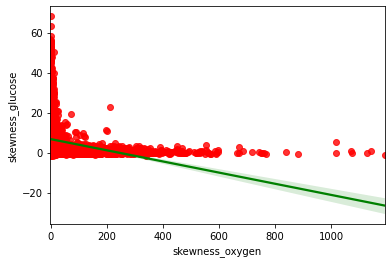

In [33]:
sns.regplot(x=skew_oxy_ana, y=skew_glu_ana,scatter_kws={"color": "red"}, line_kws={"color": "green"})
print("Pearson correlation: %.3f" % skew_oxy_ana.corr(skew_glu_ana))

Ked za pozrieme na koleraciu vidim e je negativna a jej absolutna hodnota nieje prave najvsysie co znamena ze je medzi tymito datami korelacia ale nieje az taka signifikantna

In [34]:
# calculate cohen's d for independent samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2) 
    
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)

    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) 
    
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    
    # calculate the effect size
    d = (u1 - u2) / s 
    return d

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Cohens d value: 1.129405
Large effect - Cohens d value: 1.129405


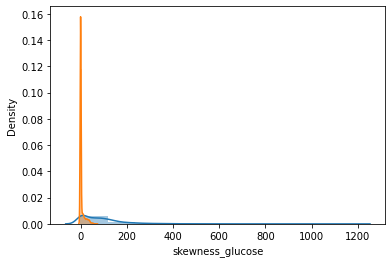

In [35]:
sns.distplot(skew_oxy_ana,bins=10)
sns.distplot(skew_glu_ana,bins=10)

cd = cohend(skew_oxy_ana, skew_glu_ana)
print('Cohens d value: %f' % cd)

# interpret
if 0.2 <= cd < 0.5:
    print('Small effect - Cohens d value: %f' % cd)
elif 0.5 <= cd < 0.8:
    print('Medium effect - Cohens d value: %f' % cd)
elif 0.8 <= cd:
    print('Large effect - Cohens d value: %f' % cd)

<AxesSubplot:xlabel='skewness_glucose', ylabel='class'>

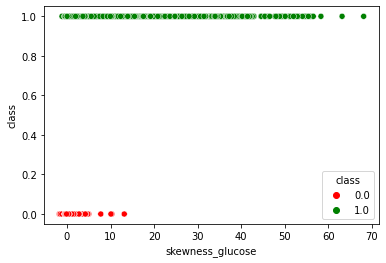

In [36]:
 sns.scatterplot(x=skew_glu_ana,y=class_ana,hue=class_ana,palette=['r','g'])

Pearson correlation: 0.682


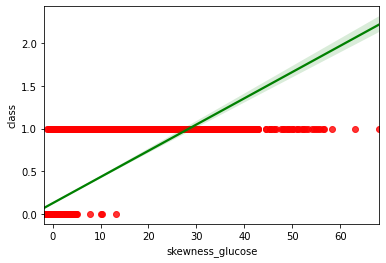

In [37]:
sns.regplot(x=skew_glu_ana, y=class_ana,scatter_kws={"color": "red"}, line_kws={"color": "green"})
print("Pearson correlation: %.3f" % class_ana.corr(skew_glu_ana))

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Cohens d value: 0.578969
Medium effect - Cohens d value: 0.578969


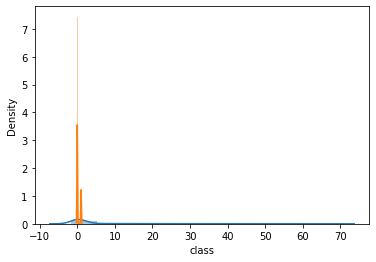

In [38]:
sns.distplot(skew_glu_ana,bins=10)
sns.distplot(class_ana,bins=10)

cd = cohend(skew_glu_ana, class_ana)
print('Cohens d value: %f' % cd)

# interpret
if 0.2 <= cd < 0.5:
    print('Small effect - Cohens d value: %f' % cd)
elif 0.5 <= cd < 0.8:
    print('Medium effect - Cohens d value: %f' % cd)
elif 0.8 <= cd:
    print('Large effect - Cohens d value: %f' % cd)

### Parova analyza a zistovanie zavislosti priemerneho kyslika(mean_oxygen) a priemernej glukozy(mean_glucose)

Z grafov nizsie mozeme usudit ze oba atributy nepochadzaju z normalnej distribucie.  
Q-Q plot oboch atributov nam ukazuje ze chvosty(tails) maju pri oboch atributoch velku vahu a tak odklanaju distribuciu do strany.

V pripade mean_oxygen je toto zosykmenie kladne kedze median sa nachadza vlavo od mean-u a teda vacsina hodnot je prave mensia ako mean.  
Naopak pri mean_glucose je toto zosykmenie zaporne kedze sa median nachadza vpravo od mean-u a teda vascina dat je vacsia ako mean.

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


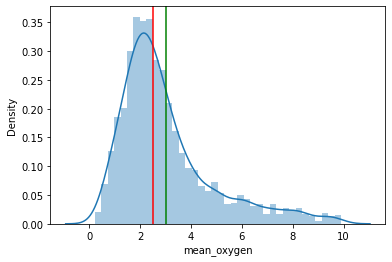

In [39]:
sns.distplot(usefull_dataset[(usefull_dataset['mean_oxygen'] < 10) &(usefull_dataset['mean_oxygen'] > 0)]['mean_oxygen'], label="mean oxygen")
plt.axvline(usefull_dataset[(usefull_dataset['mean_oxygen'] < 10) &(usefull_dataset['mean_oxygen'] > 0)]['mean_oxygen'].mean(), label='mean', color='g')
plt.axvline(usefull_dataset[(usefull_dataset['mean_oxygen'] < 10) &(usefull_dataset['mean_oxygen'] > 0)]['mean_oxygen'].median(), label='median', color='r')

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


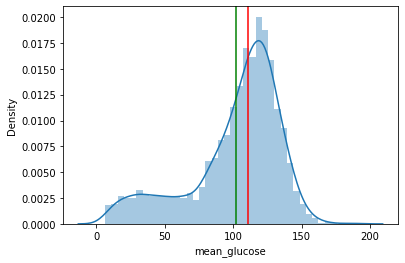

In [40]:
sns.distplot(usefull_dataset[(usefull_dataset['mean_glucose'] < 200) &(usefull_dataset['mean_glucose'] > 0)]['mean_glucose'], label="mean glucose")
plt.axvline(usefull_dataset[(usefull_dataset['mean_glucose'] < 200) &(usefull_dataset['mean_glucose'] > 0)]['mean_glucose'].mean(), label='mean', color='g')
plt.axvline(usefull_dataset[(usefull_dataset['mean_glucose'] < 200) &(usefull_dataset['mean_glucose'] > 0)]['mean_glucose'].median(), label='median', color='r')

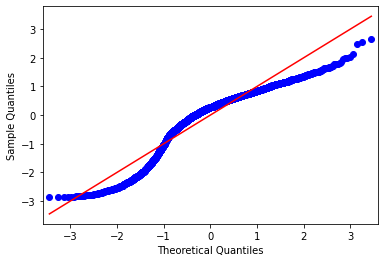

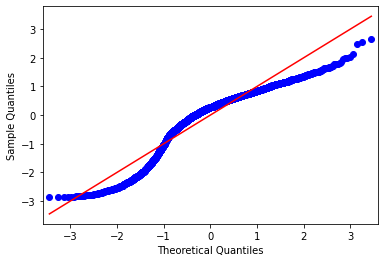

In [41]:
sm.qqplot(usefull_dataset[(usefull_dataset['mean_glucose'] < 200) &(usefull_dataset['mean_glucose'] > 0)]['mean_glucose'], line='s', fit=True)

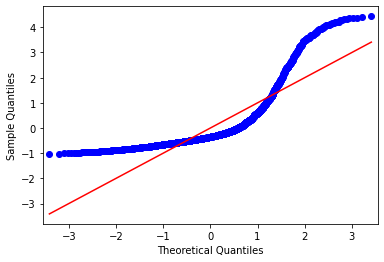

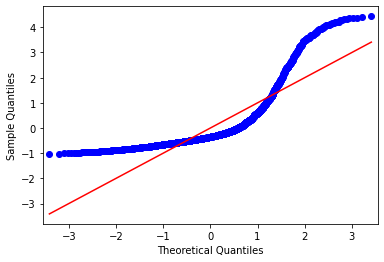

In [42]:
sm.qqplot(usefull_dataset[(usefull_dataset['mean_oxygen'] < 20) &(usefull_dataset['mean_oxygen'] > 0)]['mean_oxygen'], line='s', fit=True)

Podme sa pozriet ci so sebou nejako tieto dva atributy suvisia. Zavislosti zistime pomocov vypoctu korelacie a kovariancie dat. Na to vsak preferujeme datasety rovnakej pocetnosti dat.

2804
2804


c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean_glucose', ylabel='Density'>

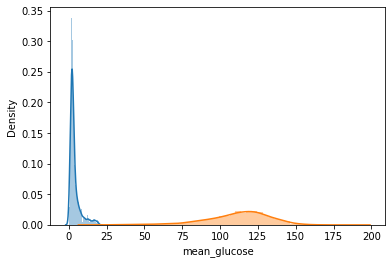

In [43]:
oxygen_dataset = usefull_dataset[(usefull_dataset['mean_oxygen'] < 20) &(usefull_dataset['mean_oxygen'] > 0) & (usefull_dataset['mean_glucose'] < 200) &(usefull_dataset['mean_glucose'] > 0)]['mean_oxygen']
glucose_dataset = usefull_dataset[(usefull_dataset['mean_oxygen'] < 20) &(usefull_dataset['mean_oxygen'] > 0) & (usefull_dataset['mean_glucose'] < 200) &(usefull_dataset['mean_glucose'] > 0)]['mean_glucose']
print(len(oxygen_dataset))
print(len(glucose_dataset))
sns.distplot(oxygen_dataset)
sns.distplot(glucose_dataset)

Skusme overit ci datasety pochadzaju z Normalnej distribucie

In [44]:
shapiro_test = stats.shapiro(oxygen_dataset)
print(shapiro_test)

# interpret
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Another distributions (reject H0)')

ShapiroResult(statistic=0.7124553918838501, pvalue=0.0)
Another distributions (reject H0)


In [45]:
shapiro_test = stats.shapiro(glucose_dataset)
print(shapiro_test)

# interpret
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Another distributions (reject H0)')

ShapiroResult(statistic=0.9631136059761047, pvalue=3.604058340624339e-26)
Another distributions (reject H0)


Datasety nepochadzaju z normalnej distribucie

Skusme overit ci pochadzaju z rovnakych distribucii

In [46]:
stat, p = stats.mannwhitneyu(oxygen_dataset, glucose_dataset) 
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)') 
else:
    print('Different distribution (reject H0)')

Statistics=8.000, p=0.000
Different distribution (reject H0)


Ako uz spomenute a prdpokladan0 vyssie data nepochadzaju z rovnakych distribucii

Skusme overit korelaciu tychto dvoch atributov aj ked pochadzaju z roznych distribucii mozno sa ovplyvnuju

In [47]:
corr, _ = stats.pearsonr(oxygen_dataset, glucose_dataset) 
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.322


Korelacia medzi tymito dvoma atributmi je prislaba na to aby sme mohli uvazovat a ovplyvnovanie jedneho atributu druhym

Podme to overit zistenim kovariancie tychto atributov

In [48]:
covariance = np.cov(oxygen_dataset, glucose_dataset)[0, 1]
print(covariance)

-24.673671591699012


Kovariancia je zaporna co by znamenalo ze jedna velicina negativne ovplyvnuje druhu avsak hodnota je primala

### Parova analyza a zistovanie zavislosti veku(age) a sklonu glukozy(skewness_glucose)

pre prehladnost sme najprv rozdelili respondentov do vekovych skupin a znazornili sme si boxplot kde na osu x sme umiestnili vekove kategorie a na osu y sme dosadili sklon glukozy. 



<AxesSubplot:xlabel='age_group', ylabel='skewness_glucose'>

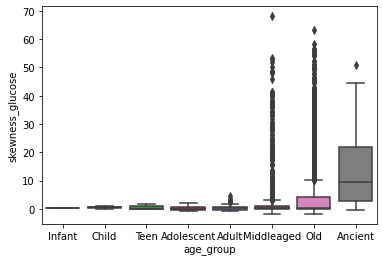

In [49]:
bins = [0, 5, 10, 15, 20, 30, 50, 80, 120]
labels = ['Infant', 'Child', 'Teen', 'Adolescent', 'Adult', 'Middleaged', 'Old', 'Ancient']
usefull_dataset['age_group'] = pd.cut(usefull_dataset['age'], bins=bins, labels=labels, right=False)
sns.boxplot(x=usefull_dataset['age_group'], y=usefull_dataset['skewness_glucose'])

Upravime si datasety aby obsahovali rovnake mnozstvo zaznamov a neobsahovali prilis kajne hodnoty teda znormalizujeme si tieto datasety

In [50]:
age_dataset = usefull_dataset[(usefull_dataset['age'] > 18) & (usefull_dataset['age'] < 90) & (usefull_dataset['skewness_glucose'] > 0) & (usefull_dataset['skewness_glucose'] < 20)]['age']
skewness_dataset = usefull_dataset[(usefull_dataset['age'] > 18) & (usefull_dataset['age'] < 90) & (usefull_dataset['skewness_glucose'] > 0) & (usefull_dataset['skewness_glucose'] < 20)]['skewness_glucose']

print(len(age_dataset))
print(len(skewness_dataset))

2349
2349


Distribucia veku je podobna normalnej distribucii avska shapirov test nam toto tvrdenie vyvracia

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


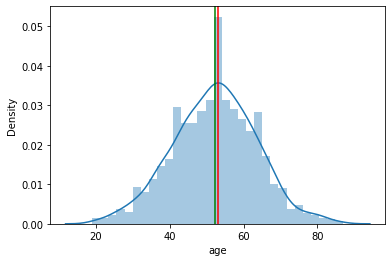

In [51]:
sns.distplot(age_dataset)
plt.axvline(age_dataset.mean(), label='mean', color='g')
plt.axvline(age_dataset.median(), label='median', color='r')

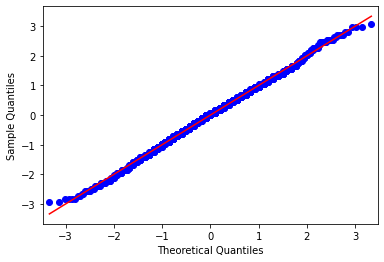

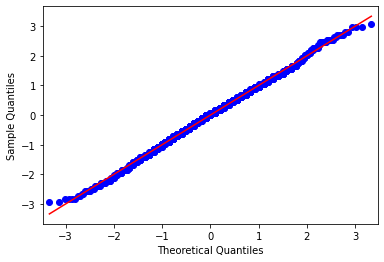

In [52]:
sm.qqplot(age_dataset, line='s', fit=True)

Distribucia sklonu glukozy je zjavne mimo normalnej distribucie co potvrdzuje aj shapirov test

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


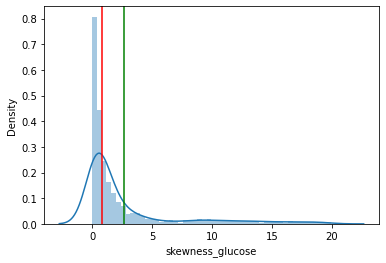

In [53]:
sns.distplot(skewness_dataset)
plt.axvline(skewness_dataset.mean(), label='mean', color='g')
plt.axvline(skewness_dataset.median(), label='median', color='r')

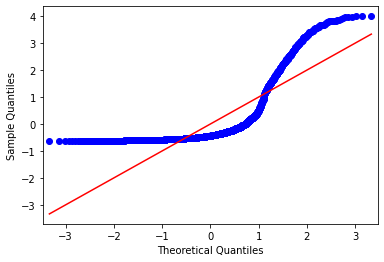

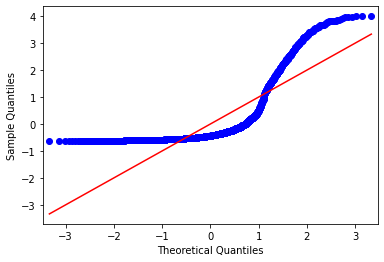

In [54]:
sm.qqplot(skewness_dataset, line='s', fit=True)

<AxesSubplot:xlabel='age', ylabel='skewness_glucose'>

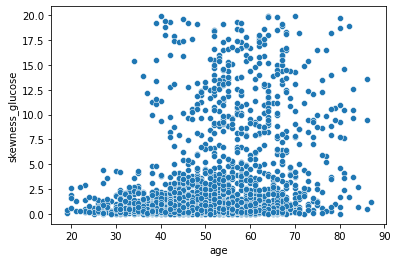

In [55]:
sns.scatterplot(x=age_dataset, y=skewness_dataset)

In [56]:
shapiro_test = stats.shapiro(age_dataset)
print(shapiro_test)

# interpret
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Another distributions (reject H0)')

ShapiroResult(statistic=0.9978591203689575, pvalue=0.0029075287748128176)
Another distributions (reject H0)


In [57]:
shapiro_test = stats.shapiro(skewness_dataset)
print(shapiro_test)

# interpret
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Another distributions (reject H0)')

ShapiroResult(statistic=0.6274491548538208, pvalue=0.0)
Another distributions (reject H0)


In [58]:
stat, p = stats.mannwhitneyu(age_dataset, skewness_dataset) 
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)') 
else:
    print('Different distribution (reject H0)')

Statistics=32.000, p=0.000
Different distribution (reject H0)


In [59]:
corr, _ = stats.pearsonr(age_dataset, skewness_dataset) 
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.250


In [60]:
covariance = np.cov(age_dataset, skewness_dataset)[0, 1]
print(covariance)

12.229077766707228


# Hypotézy

## Hypoteza: S vekom sa zvysuje pravdepodobnost ochorenia cukrovky

Z paroveho grafu hodnot atributu class a atributu age ktore nam znazornuju stav respondenta(ma/nema cukrovku) a vek respondenta vidime, ze pre hodnoty nizkeho veku nie su takmer ziadne alebo ziadne pozitivne zaznamy a naopak vo vysokom veku su takmer vsetky zaznamy pozitivne. V nasledujucih riadkoch sa pokusime overit tuto hypotezu.

Precistime dataset od extremnych hodnot a vytvorime pairplot aby sme videli vztahy medzi atributmi

3900 3900
3900


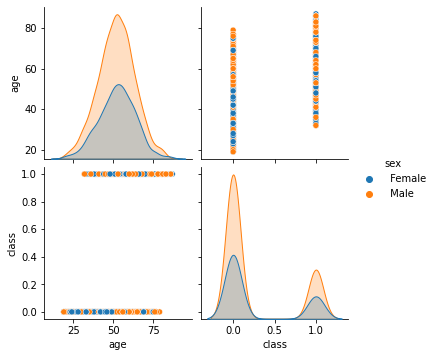

In [61]:
class_dataset = usefull_dataset[(usefull_dataset['class'] >= 0) & (usefull_dataset['age'] > 18) & (usefull_dataset['age'] < 90)][['class', 'name']]
age_dataset = usefull_dataset[(usefull_dataset['class'] >= 0) & (usefull_dataset['age'] > 18) & (usefull_dataset['age'] < 90)][['age','name']]
print(len(class_dataset), len(age_dataset))
merged_dataset = age_dataset.merge(class_dataset, on=['name'], how='inner').merge(usefull_dataset[['name','sex']], on=['name'], how='inner')
sns.pairplot(merged_dataset, hue='sex')
print(len(merged_dataset))

<AxesSubplot:xlabel='class', ylabel='age'>

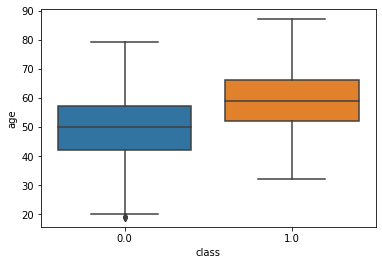

In [62]:
sns.boxplot(x=merged_dataset['class'], y=merged_dataset['age'])

Na boxovom grafe mozeme tiez vidiet ze starsi respondenti maju vacsi pocet chorych

V dosledku roznorodosti vekov v datasete usporiadame respondentov do vekovych kategorii a zistime percentualne kolko respondentov v danej kategorii je chorych.

In [63]:
bins = [18, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90]
labels = [ '18', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80']
usefull_dataset['age_group'] = pd.cut(usefull_dataset['age'], bins=bins, labels=labels, right=False)
percent_ill = usefull_dataset[(usefull_dataset['class'] == 1)]['age_group'].value_counts()/usefull_dataset['age_group'].value_counts()
percentage_values = np.array(percent_ill, dtype=list)
print(percent_ill)


18    0.000000
30    0.041667
35    0.083624
40    0.101695
45    0.178876
50    0.241427
55    0.277429
60    0.380753
65    0.457746
70    0.580645
75    0.762712
80    1.000000
Name: age_group, dtype: float64


Tu mozeme vidiet stupajucu tendenciu precent chorych respondentov

Pridame do datasetu stlpec ktory bude hovorit o rizikovosti vekovej skupiny na chorobu a tuto hodnotu naparujeme s vekom a uvidime na boxplote ako so stupajucim vekom pribuda podiel chorych

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='illness_percentage', ylabel='Density'>

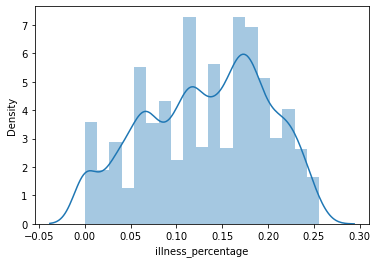

In [64]:
usefull_dataset['illness_percentage'] = usefull_dataset.apply(lambda row: usefull_dataset[(usefull_dataset['age'] <= row.age) & (usefull_dataset['class'] == 1)]['age'].count()/usefull_dataset[(usefull_dataset['age'] <= row.age) & (usefull_dataset['class'] >=0)]['age'].count(), axis=1)

sns.distplot(usefull_dataset['illness_percentage'])

<AxesSubplot:xlabel='age', ylabel='illness_percentage'>

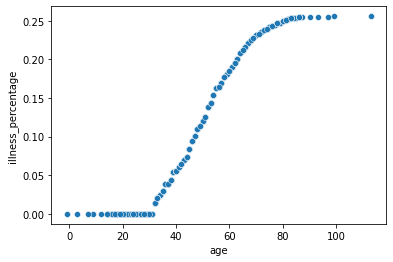

In [65]:
sns.scatterplot(x=usefull_dataset['age'], y=usefull_dataset['illness_percentage'])

Aj na nasledovnych grafoch rozdelenych podla vekov chorych a vekov zdravych vidime ze podiel chorych sa zvysuje s vekom ako sa grafy prestavaju prekryvat

In [66]:
shapiro_test = stats.shapiro(usefull_dataset['illness_percentage'])
print(shapiro_test)

# interpret
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Another distributions (reject H0)')

ShapiroResult(statistic=0.9697452187538147, pvalue=4.878268363713608e-28)
Another distributions (reject H0)


In [67]:
shapiro_test = stats.shapiro(usefull_dataset['age'])
print(shapiro_test)

# interpret
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Another distributions (reject H0)')

ShapiroResult(statistic=0.9960983991622925, pvalue=1.1913694031306932e-08)
Another distributions (reject H0)


In [68]:
levene_test = stats.levene(usefull_dataset['illness_percentage'], usefull_dataset['age'])
print(levene_test)

# interpret
alpha = 0.05
if levene_test.pvalue > alpha:
    print('Equal variances (fail to reject H0)')
else:
    print('Another variances (reject H0)')

LeveneResult(statistic=6092.7612909438685, pvalue=0.0)
Another variances (reject H0)


In [69]:
stat, p = stats.mannwhitneyu(usefull_dataset['illness_percentage'], usefull_dataset['age']) 
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)') 
else:
    print('Different distribution (reject H0)')

Statistics=3933.000, p=0.000
Different distribution (reject H0)


Vo vyssie uvedenych testoch sme testovali podobnost distribucii vekov chorych a zdravych ludi a zistili sme ze nie su z normalnej distribucie no maju podobnu varianciu co moze naznacovat spojitost

Dalej si overime korelaciu medzi vekom a podielom chorych

Korelacia nam vysla 0,98 co je velmi blizko k 1 cize mozeme povedat ze atributy kladne koreluju a rastu spolu

In [70]:
corr, _ = stats.pearsonr(usefull_dataset['illness_percentage'], usefull_dataset['age']) 
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.980


Dalej si overime covarianciu

Vidime ze kovariancia je pomerne nizka co naznacuje ze jeden atribut vplyva na druhy ale iba velmi slabo

In [71]:
covariance = np.cov(usefull_dataset['illness_percentage'], usefull_dataset['age'])[0, 1]
print(covariance)

0.7683064730843954


In [72]:
cd = cohend(usefull_dataset['age'], usefull_dataset['illness_percentage'])
print('Cohens d value: %f' % cd)

Cohens d value: 6.186509


Vyssie sme zistili ze korelacia je velmi vysoka medzi vekom a percentom ludi s ochorenim ktori su rovnako stari alebo mladsi z grafov mozeme vidiet ze s pribudajucim vekom sa toto percento zvysuje napriek tomu ze taktiez zvacsujeme vzorku co napomaha k potvrdeniu hypotezy kovariancia nam vysla kladna co sme taktiez predpokladali a teda ze s vekom rastie percento chorych. Z grafov a vypoctov mozeme teda nasu hypotezu povazovat za potvrdenu.

## Nulova hypoteza ludia s odchylkou glukozy od priemeru maju vacsiu pravdepodobnost mat cukrovku
## Alternativna nulova hypoteza ludia s odchylkou glukozy od priemeru maju vacsiu pravdepodobnost mat cukrovku

### Overenie predpokladov
#### Predpoklad normálnosti rozdelenia
Na overenie normálnosti vieme použiť aj Shapiro-Wilkov test, ktorý testuje nulovú hypotézu, že dáta pochádzajú z normálneho rozdelenia. Ak je  
p < 0,05, nulovú hypotézu zamietame a dáta pravdepodobne pochádzajú z iného ako normálneho rozdelenia. Ak je  p > 0,05, nulovú hypotézu nezamietame, 
teda na základe dát nemôžeme prehlásiť, že by dáta pochádzali z iného, ako normálneho rozdelenia.

In [73]:
class_data = usefull_dataset[(usefull_dataset['class'] >= 0) & (usefull_dataset['skewness_glucose'] > 0)]['class']
skew_data = usefull_dataset[(usefull_dataset['class'] >= 0) & (usefull_dataset['skewness_glucose'] > 0)]['skewness_glucose']

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='class', ylabel='Density'>

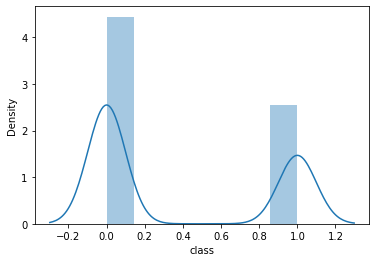

In [74]:
sns.distplot(class_data)

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='skewness_glucose', ylabel='Density'>

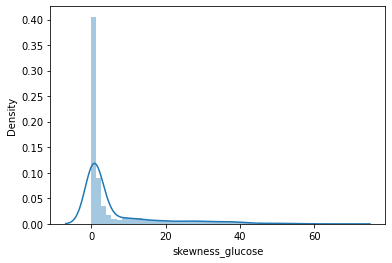

In [75]:
sns.distplot(skew_data)

In [76]:
shapiro_test = stats.shapiro(class_data)
print(shapiro_test)

# interpret
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Another distributions (reject H0)')

ShapiroResult(statistic=0.6097676753997803, pvalue=0.0)
Another distributions (reject H0)


In [77]:
shapiro_test = stats.shapiro(skew_data)
print(shapiro_test)

# interpret
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Another distributions (reject H0)')

ShapiroResult(statistic=0.6159499287605286, pvalue=0.0)
Another distributions (reject H0)


#### Nakolko pvalue pri class_data a aj pri skewness_data je menej ako 0.05 musime pouzit Mann-Whitneyho U-test

## Mann-Whitney U test

Similar to T-test, but non-parametric for at least 20 observations in each data sample.

**Hypothesis**
- $H_0$ = no difference between the distributions of the data samples 
- **Fail to Reject $H_0$**: Sample distributions are equal 
- **Reject $H_0$**: Sample distributions are not equal

In [78]:
# compare samples
stat, p = stats.mannwhitneyu(skew_data, class_data) 
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)') 
else:
    print('Different distribution (reject H0)')

Statistics=1276281.000, p=0.000
Different distribution (reject H0)


## Statistical power

3.483886091817008


c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


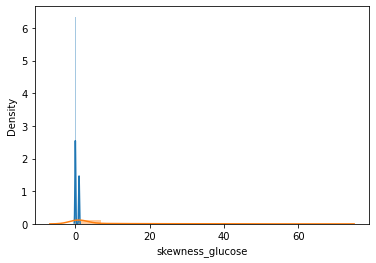

In [79]:
# plotting
sns.distplot(class_data, bins=10)
sns.distplot(skew_data, bins=10)

# calculate covariance matrix
covariance = np.cov(skew_data, class_data)[0, 1]
print(covariance)

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='observation', ylabel='score'>

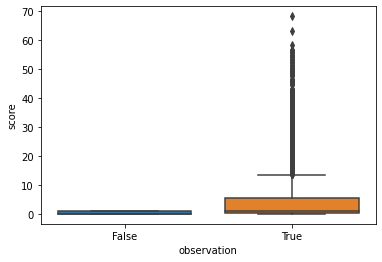

In [80]:
df = pd.DataFrame({'observation': np.repeat([True, False], len(class_data)), 
                   'score': np.concatenate((skew_data, class_data))})
sns.boxplot('observation', 'score', data=df)

Podla vysledkov by malo byt jasne ze nasa hypoteza je pravdiva ale nemusi byt ochorenie az prilis zavysle od odchylky glukozy

## Identifikácia problémov s dátami v datasetoch

Medzi problemy s nevhodnou strukturou dat by som radil adresu ktora je cela ulozena ako string. Tieto data mohly byt ulozene ako json a dalo by sa s nimi lahsie pracovat. Napriklad keby chceme graf o udajoch podla statu musime si ich najpv vybrat zo stringu.

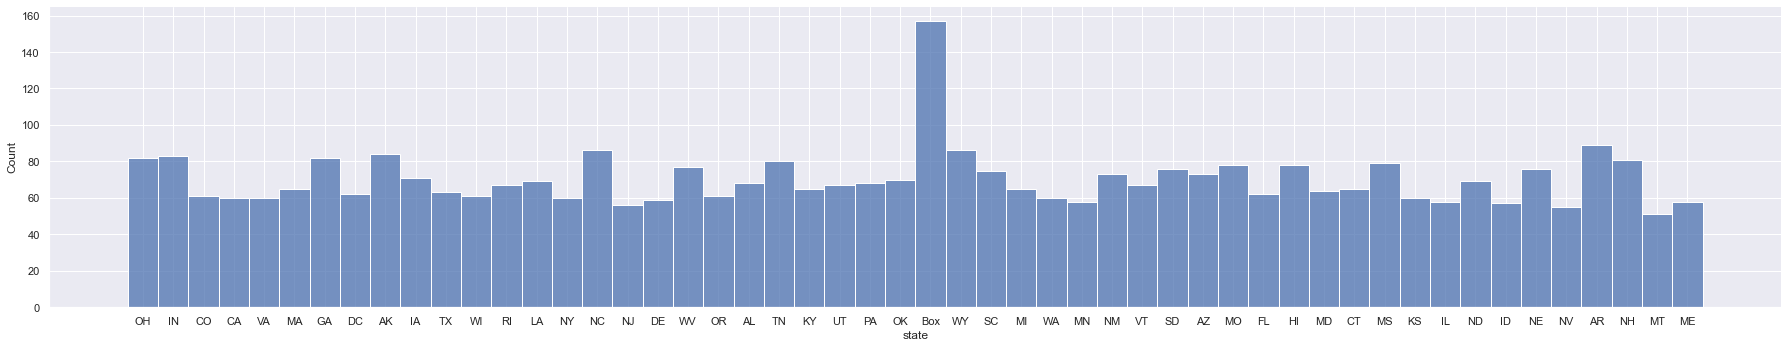

In [81]:
column_one = personal_data['address'].str.split(', ',expand=True)[0]
column_two_and_three = personal_data['address'].str.split(', ',expand=True)[1]
column_two = column_two_and_three.str.split(' ',expand=True)[0]
column_three = column_two_and_three.str.split(' ',expand=True)[1]

personal_data['address'] = column_one
personal_data['state'] = column_two
personal_data['postal_code'] = column_three

sns.set_theme(style="darkgrid")
sns.displot(data=personal_data['state'].dropna(),aspect = 5)

dalsi problem s datami je ze medzi personal_data sa nachadzaju neplatne data ako napriklad osoba ktora ma -1 rokov

In [82]:
personal_data.age.min()

-1

Problem je aj s nekonzistenciov formatovania datumov kde hned prvy je inak formatovany ako ostatne
a to nehovoriac o tom ze kolonka vek nekoresponduje s datumom narodenia. jedine ze by tam boli aj datumy z historie ako napriklad rok narodenia 55

In [83]:
personal_data[["date_of_birth","age"]]

,date_of_birth,age
0,18/01/1961,58
1,1962-11-08,56
2,1967-04-18,52
3,55-09-04,64
4,1952-12-05,66
...,...,...
3928,1974-04-16,45
3929,1971-10-18,48
3930,36-04-15,83
3931,1970-05-06,49


Pri Medical_data su problemy s datamy trosku ine napriklad ma nulove hodnoty kde vsetky zaznamy su len z mien a adries inak kazda kategoria ma nejake null hodnoty

In [84]:
other_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             3983 non-null   object 
 1   address          3983 non-null   object 
 2   kurtosis_oxygen  3973 non-null   float64
 3   occupation       3963 non-null   object 
 4   marital-status   3967 non-null   object 
 5   pregnant         3973 non-null   object 
 6   education-num    3572 non-null   float64
 7   relationship     3970 non-null   object 
 8   std_oxygen       3966 non-null   float64
 9   capital-gain     3970 non-null   float64
 10  skewness_oxygen  3963 non-null   float64
 11  education        3963 non-null   object 
 12  fnlwgt           3974 non-null   float64
 13  class            3966 non-null   float64
 14  income           3966 non-null   object 
 15  medical_info     3970 non-null   object 
 16  native-country   3973 non-null   object 
 17  capital-loss  

Dalsi problem s other_data je ze data pre medical info sa tvaria ze su JSON ale niesu koli tomu ze pouzivaju jednoite uvodzovky 

In [85]:
other_data.medical_info[0]

"{'mean_glucose':'117.4375','std_glucose':'47.61068518','kurtosis_glucose':'0.149848307','skewness_glucose':'0.148917285'}"

takysto ako pri personal data tak aj pri other_data sa v datach nachadzaju nezmysli ako napriklad ze musi su tehotny

In [86]:
other_data[other_data['pregnant'] == "t"]

,name,address,kurtosis_oxygen,occupation,marital-status,pregnant,education-num,relationship,std_oxygen,capital-gain,...,fnlwgt,class,income,medical_info,native-country,capital-loss,mean_oxygen,hours-per-week,race,workclass
6,Gary Anderson,"80176 Karen Locks\r\nSherryland, NC 20857",8.859609,Adm-clerical,Never-married,t,9.0,Own-child,17.925133,0.0,...,185452.0,0.0,<=50K,"{'mean_glucose':'109.4765625','std_glucose':'4...",United-States,0.0,2.304348,40.0,White,Private
67,Ernest Wallin,"08888 Michael Hill\r\nJustinport, MO 39902",6.289634,Tech-support,Never-married,t,NaN,Not-in-family,19.149346,0.0,...,34173.0,0.0,<=50K,"{'mean_glucose':'140.515625','std_glucose':'47...",United-States,0.0,3.772575,40.0,White,Private
142,Kenneth Weatherholt,6644 Marshall Mountains Suite 928\r\nWest Susa...,2.144711,Exec-managerial,Never-married,t,14.0,NaN,NaN,NaN,...,170230.0,1.0,>50K,"{'mean_glucose':'76.96875','std_glucose':'41.4...",United-States,0.0,NaN,60.0,NaN,NaN
161,Neal Hills,"682 Jimenez Coves\r\nJoseborough, SD 48776",12.608811,Adm_clerical,Widowed,t,10.0,Not-in-family,14.083288,0.0,...,74784.0,0.0,<=50K,"{'mean_glucose':'121.421875','std_glucose':'55...",United-States,0.0,1.579431,40.0,White,Local-gov
211,Cody Brown,USNV Chapman\r\nFPO AP 06085,14.323632,Prof-specialty,Married-civ-spouse,t,10.0,Wife,10.896719,0.0,...,187728.0,0.0,>50K,"{'mean_glucose':'92.953125','std_glucose':'46....",United-States,1887.0,1.300167,50.0,White,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,Roy Tuner,"72977 James Gateway Apt. 966\r\nTylerport, NC ...",4.036193,Prof-specialty,Married-civ-spouse,t,14.0,Wife,43.422295,0.0,...,159782.0,1.0,>50K,"{'mean_glucose':'62.765625','std_glucose':'33....",United-States,0.0,10.989130,45.0,White,State-gov
3816,Anthony Foster,"4337 Aaron Gardens Apt. 359\r\nPaulbury, CO 90029",13.981809,?,Married-civ-spouse,t,13.0,Husband,14.557123,0.0,...,208311.0,0.0,>50K,"{'mean_glucose':'125.3984375','std_glucose':'5...",United-States,0.0,1.128763,80.0,White,?
3847,Frank Basel,"948 Kyle Stravenue\r\nWest Ryan, ID 51923",3.274483,Other-service,Separated,t,10.0,Not-in-family,40.525963,0.0,...,280422.0,0.0,<=50K,"{'mean_glucose':'119.078125','std_glucose':'47...",Peru,0.0,12.497492,25.0,White,Private
3876,Louis Perrien,"02294 Debra Common Suite 037\r\nWest Raymond, ...",0.204406,Prof-specialty,Never-married,t,13.0,Own-child,72.147916,0.0,...,121144.0,1.0,<=50K,"{'mean_glucose':'8.109375','std_glucose':'33.7...",United-States,0.0,111.352007,18.0,Black,Local-gov


medzi dalsie problemy datasetu other_data radim nazvy atributov ktore casto nemaju ziadny vyznam alebo je nedostacujuci na pochopenie o com hovori

celkovo v other_data sa nachadza vela Null hodnot ktore budeme naskor riesit tak ze patricny riadok budeme ignorovat s pouzitim Pairwise deletion toto budeme pouzivat aj pri neplatnych datach ktore boli opisovane vyssie